In [25]:
import numpy as np
import seaborn as sns
import pandas as pd

## Reading The data set

In [26]:
data=pd.read_csv('water_potability.csv')

In [27]:
print(data)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

# Exploratory Data Analysis

## Checking the type of the feature variables

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## We observe that other than potability all the other features represent a floating point number and potability represents an integer  number

## Checking if there are any null values present in any columns

<AxesSubplot:>

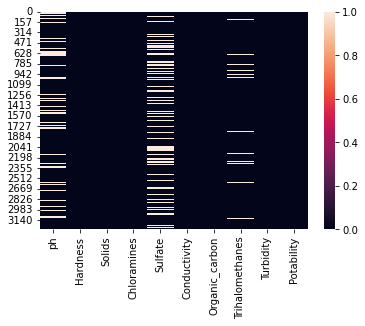

In [29]:
sns.heatmap(data.isnull())
# Graphical way of checking null values

In [30]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## We are able to see that there are null values present in the columns pH, sulfate and Trihalomethanes

## let us look into each column that has a null value and let us impute it with the required measure of central tendency

### Let us first consider the column ' pH'

C:\Users\atul_\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ph'>

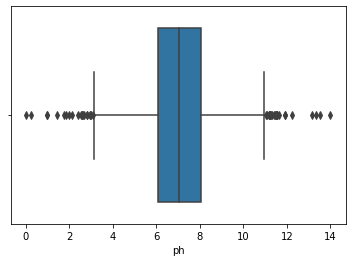

In [31]:
sns.boxplot(data.ph)

C:\Users\atul_\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

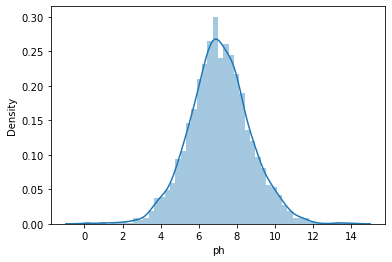

In [32]:
sns.distplot(data.ph)

## We can see that the data has an almost perfectly normal distribution

### When we have a perfectly normal distribution we can assume that there are no outliers that will impact the mean , hence imputing the column 'pH' with mean would be the best way

## Imputing with mean

In [36]:
data["ph"] = data["ph"].replace(np.NaN, data["ph"].mean())

In [37]:
data.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### No missing values in the column ph

## let us now consider the column ' sulfate'


C:\Users\atul_\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sulfate'>

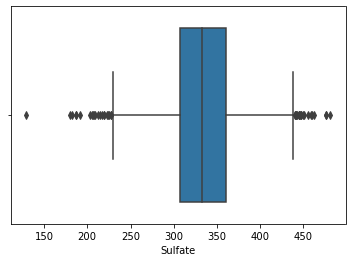

In [41]:
sns.boxplot(data.Sulfate)

C:\Users\atul_\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sulfate', ylabel='Density'>

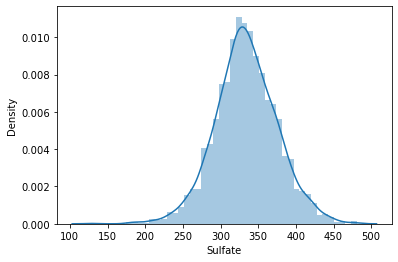

In [42]:
sns.distplot(data.Sulfate)

## Again we see that the data is almost prefectly normally distributed

## hence we can impute with the mean 

In [43]:
data["Sulfate"] = data["Sulfate"].replace(np.NaN, data["Sulfate"].mean())

In [44]:
data.isna().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### No null in the column Sulfate

## Let us now consider the column trihalosulfates

C:\Users\atul_\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Trihalomethanes'>

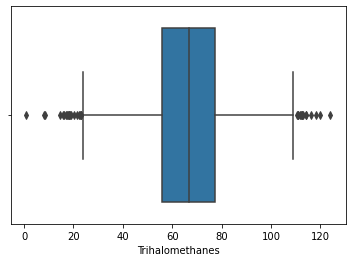

In [46]:
sns.boxplot(data.Trihalomethanes)

C:\Users\atul_\anaconda3.1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trihalomethanes', ylabel='Density'>

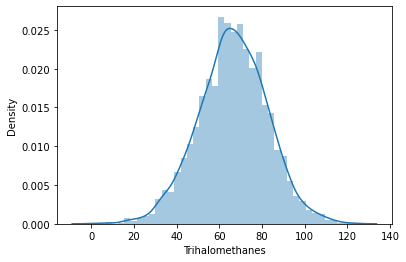

In [48]:
sns.distplot(data.Trihalomethanes)

## We can use mean to impute the missing values

In [49]:
data["Trihalomethanes"] = data["Trihalomethanes"].replace(np.NaN, data["Trihalomethanes"].mean())

In [50]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Dataset is now free of any null values